In [3]:
import sklearn
import pandas as pd

In [4]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head(2)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_')

In [5]:
df = df[df['Life_expectancy'].notna()]

In [6]:
print('Minimum Life Expectancy :',df['Life_expectancy'].min())
print('Maximum Life Expectancy :',df['Life_expectancy'].max())

Minimum Life Expectancy : 36.3
Maximum Life Expectancy : 89.0


In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            193
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 32
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

In [8]:
X = df.drop('Life_expectancy',axis=1)
y = df['Life_expectancy']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape

((2342, 21), (586, 21))

In [10]:
X_train.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            157
percentage_expenditure               0
Hepatitis_B                        431
Measles                              0
BMI                                 24
under-five_deaths                    0
Polio                               15
Total_expenditure                  184
Diphtheria                          15
HIV/AIDS                             0
GDP                                353
Population                         523
thinness__1-19_years                24
thinness_5-9_years                  24
Income_composition_of_resources    130
Schooling                          130
dtype: int64

In [11]:
X_test.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                             36
percentage_expenditure               0
Hepatitis_B                        122
Measles                              0
BMI                                  8
under-five_deaths                    0
Polio                                4
Total_expenditure                   42
Diphtheria                           4
HIV/AIDS                             0
GDP                                 90
Population                         121
thinness__1-19_years                 8
thinness_5-9_years                   8
Income_composition_of_resources     30
Schooling                           30
dtype: int64

In [12]:
df[df.Hepatitis_B == df.Polio].shape

(827, 22)

In [13]:
df_difference = pd.DataFrame()
df_difference['Hepatitis_B'] = df['Hepatitis_B']
df_difference['Polio'] = df['Polio']
df_difference['difference'] = abs(df['Hepatitis_B'] - df['Polio'])

df_difference[(df_difference['difference'] > 0) & (df_difference['difference'] < 10)]

,Hepatitis_B,Polio,difference
1,62.0,58.0,4.0
2,64.0,62.0,2.0
9,64.0,58.0,6.0
10,66.0,58.0,8.0
24,98.0,99.0,1.0
...,...,...,...
2930,72.0,73.0,1.0
2931,68.0,71.0,3.0
2932,65.0,69.0,4.0
2933,68.0,67.0,1.0


In [14]:
X_train.Hepatitis_B.fillna(0,inplace=True)

Hepatitis_B = []
for index,row in X_train.iterrows():
    if row['Hepatitis_B'] == 0:
        Hepatitis_B.append(row['Polio'])
    else:
        Hepatitis_B.append(row['Hepatitis_B'])

X_train.Hepatitis_B = Hepatitis_B

C:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
X_test.Hepatitis_B.fillna(0,inplace=True)

Hepatitis_B = []
for index,row in X_test.iterrows():
    if row['Hepatitis_B'] == 0:
        Hepatitis_B.append(row['Polio'])
    else:
        Hepatitis_B.append(row['Hepatitis_B'])

X_test.Hepatitis_B = Hepatitis_B

In [16]:
def replace_missing_values_with_Countries_mean(Column_name,train_or_test):
    mean_imputed_list = []
    train_or_test[Column_name].fillna(0,inplace=True)
    

    for country in train_or_test.Country.unique():
        temp_df = train_or_test[train_or_test.Country == country]
        countries_mean = temp_df[Column_name].mean()
        
        for index,row in temp_df.iterrows():
            if row[Column_name] == 0:
                mean_imputed_list.append(countries_mean)
            else:
                mean_imputed_list.append(row[Column_name])
                
    return mean_imputed_list

In [17]:
X_train.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [18]:
misssing_cols_value_list = ['Population','GDP','Alcohol','Total_expenditure',
'Income_composition_of_resources','Schooling','BMI','thinness_5-9_years',
'thinness__1-19_years','Polio','Hepatitis_B','Diphtheria']

for cols in misssing_cols_value_list:
    replaced_list = replace_missing_values_with_Countries_mean(cols,X_train)
    X_train[cols] = replaced_list
    replaced_list = replace_missing_values_with_Countries_mean(cols,X_test)
    X_test[cols] = replaced_list

C:\Users\ThinkPad\AppData\Local\Temp/ipykernel_3912/318379513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = replaced_list
C:\Users\ThinkPad\AppData\Local\Temp/ipykernel_3912/318379513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols] = replaced_list


In [19]:
X_train.isna().sum()

Country                            0
Year                               0
Status                             0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [20]:
X_test.isna().sum()

Country                            0
Year                               0
Status                             0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2342, 21)
(586, 21)
(2342,)
(586,)


<AxesSubplot:>

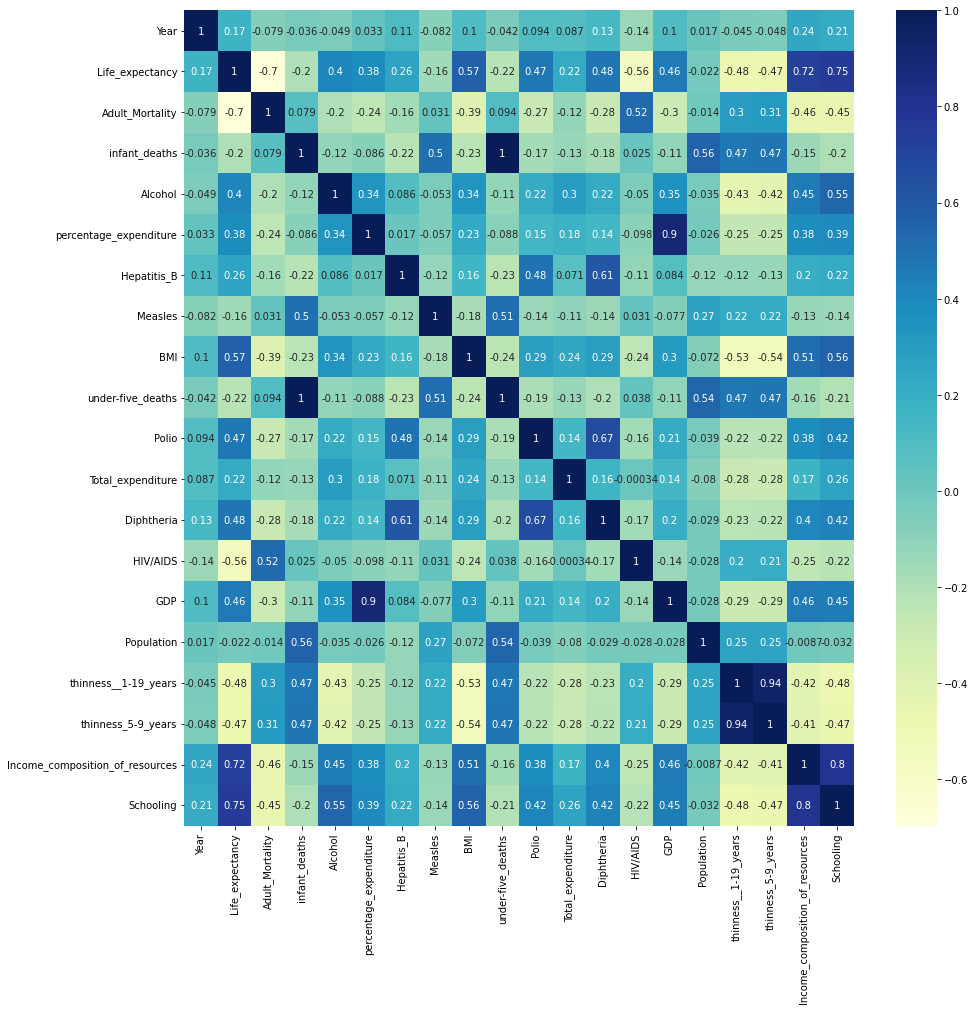

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [23]:
X_train.drop(labels=['Year','Status'],axis=1,inplace=True)
X_test.drop(labels=['Year','Status'],axis=1,inplace=True)

C:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train, 0.75)
corr_features

{'Schooling', 'thinness_5-9_years', 'under-five_deaths'}

In [26]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

<AxesSubplot:>

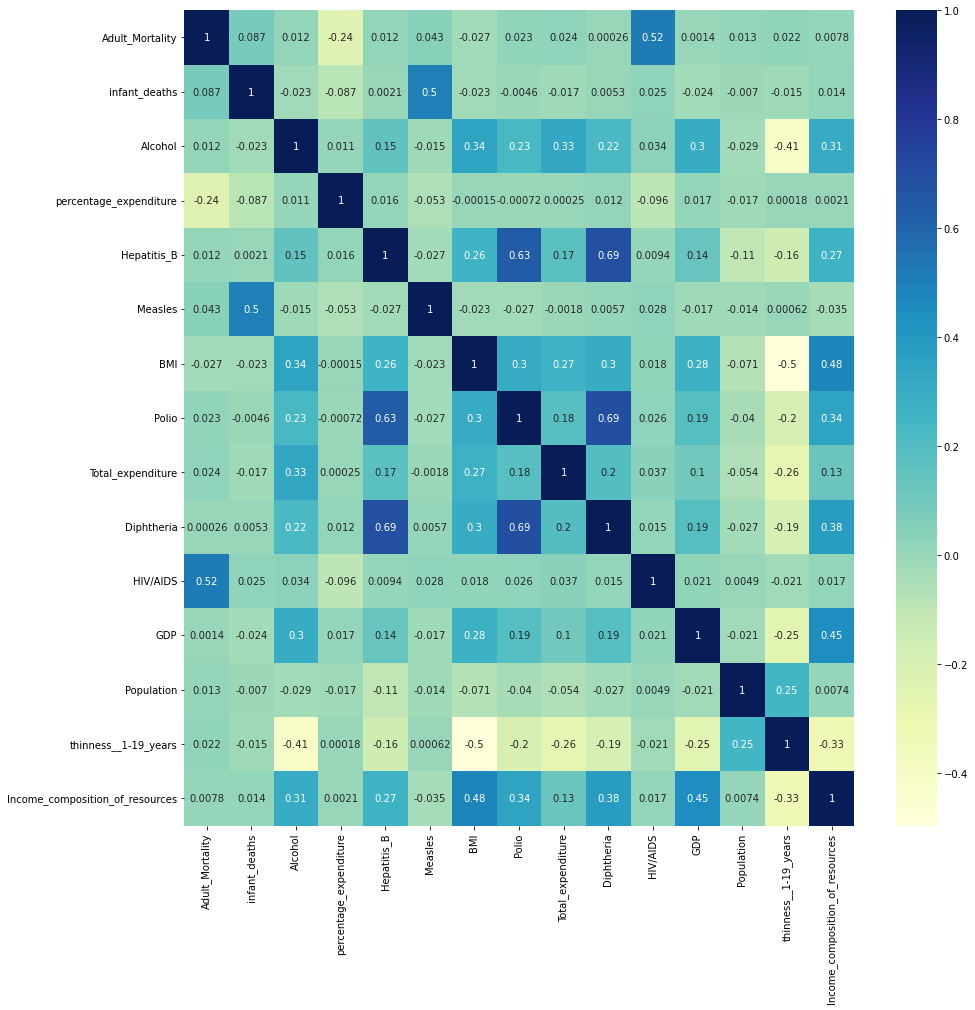

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,cmap="YlGnBu")

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [29]:
ct = ColumnTransformer([('cat',OneHotEncoder(),['Country'])],
remainder = 'passthrough')
ct.fit_transform(X_train)

<2342x198 sparse matrix of type '<class 'numpy.float64'>'
	with 34507 stored elements in Compressed Sparse Row format>

In [30]:
pipe = Pipeline([('cat',ct),('linear',LinearRegression())])

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('cat',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Country'])])),
                ('linear', LinearRegression())])

In [32]:
pipe.score(X_test,y_test)

0.6054158907399623

In [33]:
X_train = pd.get_dummies(X_train, columns=['Country'],drop_first=True)

In [34]:
X_train

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
2080,83.0,0,1.28,448.595299,96.0,144,65.0,95.0,2.58,96.0,...,0,0,0,0,0,0,0,0,0,0
2810,116.0,0,1.18,0.000000,97.0,0,65.1,98.0,3.10,97.0,...,0,0,1,0,0,0,0,0,0,0
1284,58.0,2,1.11,483.191684,97.0,0,65.0,95.0,3.61,96.0,...,0,0,0,0,0,0,0,0,0,0
1574,441.0,32,1.24,13.776175,94.0,26,65.1,97.0,2.31,94.0,...,0,0,0,0,0,0,0,0,0,0
642,97.0,0,1.13,1884.098811,93.0,0,67.0,93.0,2.16,92.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,326.0,2,0.01,106.035466,42.0,71,23.3,47.0,0.00,42.0,...,0,0,0,0,0,0,0,0,0,0
837,337.0,3,0.01,1500.412635,26.0,1190,2.2,26.0,0.00,26.0,...,0,0,0,0,0,0,0,0,0,0
1656,214.0,8,0.01,8.353075,4.0,1292,21.1,4.0,0.00,31.0,...,0,0,0,0,0,0,0,0,0,0
2616,276.0,3,0.01,49.069672,47.0,0,22.9,47.0,0.00,42.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_test = pd.get_dummies(X_test, columns=['Country'],drop_first=True)

In [36]:
X_test

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
2225,217.0,0,4.14,49.936982,87.0,0,24.7,98.0,7.44,97.0,...,0,0,0,0,0,0,0,0,0,0
838,344.0,3,5.58,1493.051277,98.0,0,26.9,98.0,5.24,98.0,...,0,0,0,0,0,0,0,0,0,0
2405,485.0,55,0.01,519.156378,95.0,244,3.1,95.0,8.35,95.0,...,0,0,0,0,0,0,0,0,0,0
1969,122.0,1,5.78,623.910050,7.0,0,22.8,99.0,9.94,96.0,...,0,0,0,0,0,0,0,0,0,0
305,189.0,8,5.07,0.000000,87.0,0,2.7,87.0,8.86,82.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,177.0,0,2.03,0.000000,97.0,0,28.5,98.0,2.71,98.0,...,0,0,0,0,0,0,0,0,0,0
2034,218.0,66,1.73,13.399051,96.0,3025,31.5,97.0,4.27,97.0,...,0,0,0,0,0,0,0,0,0,0
869,135.0,0,1.45,2263.103797,94.0,4,29.9,95.0,3.17,95.0,...,0,0,0,0,0,0,0,0,0,0
2599,126.0,0,1.49,0.000000,96.0,27,3.2,96.0,3.74,96.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score

score = cross_val_score(LinearRegression(),X_train,y_train,cv=5)
score.mean() 

0.934044645905477

In [38]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
clf = GridSearchCV(LinearRegression(),parameters, cv = 5, return_train_score=False)

In [39]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [40]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088560,0.109170,0.004396,0.000490,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.936124,0.941128,0.929309,0.923801,0.939861,0.934045,0.006568,1
1,0.032181,0.003864,0.004197,0.000399,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.936124,0.941128,0.929309,0.923801,0.939861,0.934045,0.006568,3
2,0.037977,0.009565,0.004598,0.001856,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.681300,0.820950,0.715810,0.825812,0.711380,0.751050,0.060259,5
3,0.077358,0.033815,0.008501,0.001954,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.681300,0.820950,0.715810,0.825812,0.711380,0.751050,0.060259,5
4,0.054569,0.011869,0.006398,0.001020,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.936124,0.941128,0.929309,0.923801,0.939861,0.934045,0.006568,1
5,0.042997,0.007258,0.005797,0.001600,False,True,False,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.936124,0.941128,0.929309,0.923801,0.939861,0.934045,0.006568,3
6,0.046572,0.009450,0.006797,0.001326,False,False,True,"{'copy_X': False, 'fit_intercept': False, 'nor...",0.681300,0.820950,0.715810,0.825812,0.711380,0.751050,0.060259,5
7,0.034180,0.002785,0.004198,0.000979,False,False,False,"{'copy_X': False, 'fit_intercept': False, 'nor...",0.681300,0.820950,0.715810,0.825812,0.711380,0.751050,0.060259,5


In [41]:
clf.best_score_

0.9340446551908619

In [42]:
clf.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(LinearRegression(), parameters, cv =5, return_train_score=False, n_iter=5)
rs.fit(X_train,y_train)
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,param_fit_intercept,param_copy_X,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039376,0.009861,0.005801,0.000985,True,False,False,"{'normalize': True, 'fit_intercept': False, 'c...",0.681300,0.820950,0.715810,0.825812,0.711380,0.751050,0.060259,4
1,0.037777,0.003653,0.005798,0.001165,False,True,True,"{'normalize': False, 'fit_intercept': True, 'c...",0.936124,0.941128,0.929309,0.923801,0.939861,0.934045,0.006568,3
2,0.039377,0.004541,0.004998,0.000894,False,False,True,"{'normalize': False, 'fit_intercept': False, '...",0.681300,0.820950,0.715810,0.825812,0.711380,0.751050,0.060259,4
3,0.037178,0.003248,0.004798,0.000748,True,True,False,"{'normalize': True, 'fit_intercept': True, 'co...",0.936124,0.941128,0.929309,0.923801,0.939861,0.934045,0.006568,1
4,0.039976,0.005327,0.004998,0.000895,True,True,True,"{'normalize': True, 'fit_intercept': True, 'co...",0.936124,0.941128,0.929309,0.923801,0.939861,0.934045,0.006568,1


In [44]:
rs.best_score_

0.9340446551908619

In [45]:
rs.best_estimator_

LinearRegression(copy_X=False, normalize=True)